# Your Copy of the Data Dictionary:
https://docs.google.com/spreadsheets/d/1MFbQRlgFQgfpFeO1BIHJZZm1slxYM0DaZXPKvxeIhOg/edit#gid=150111846

# Quick Look at the Review Data

In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [414]:
df = pd.read_csv('../data/reviews.csv')
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


In [527]:
df.shape

(162916, 6)

In [416]:
df['listing_id'].nunique()

2741

In [417]:
df['listing_id'].nunique()

2741

In [418]:
df['comments'][2250]

"We had a wonderful stay at Atef's place.  \r<br/>Charming and nit apartment, convenient location and beautiful neighborhood. But above all, Atef's hospitality was beyond all of our expectations. Kind, pleasant, and helpful. \r<br/>\r<br/>We certainly recommend and hope to come back. "

# Quick Look at the Listings Data

In [419]:
listings = pd.read_csv('../data/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20230319180919,2023-03-19,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.26
1,5506,https://www.airbnb.com/rooms/5506,20230319180919,2023-03-19,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,...,4.88,4.53,4.74,Approved by the government,f,10,10,0,0,0.69
2,6695,https://www.airbnb.com/rooms/6695,20230319180919,2023-03-19,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,...,4.96,4.50,4.72,STR446650,f,10,10,0,0,0.74
3,8789,https://www.airbnb.com/rooms/8789,20230319180919,2023-03-20,city scrape,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Beacon Hill is a historic neighborhood filled ...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,...,4.96,4.96,4.56,NaN,f,7,7,0,0,0.24
4,4765070,https://www.airbnb.com/rooms/4765070,20230319180919,2023-03-19,city scrape,Studio w/ private entrance and bathroom,Private Studio located in Boston (town of Jama...,"Jamaica Plain (JP) is an open, artsy, hip neig...",https://a0.muscache.com/pictures/miso/Hosting-...,24584716,...,4.85,4.48,4.69,str-416042,t,1,1,0,0,3.77


In [420]:
listings.shape

(3864, 75)

In [421]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3864 non-null   int64  
 1   listing_url                                   3864 non-null   object 
 2   scrape_id                                     3864 non-null   int64  
 3   last_scraped                                  3864 non-null   object 
 4   source                                        3864 non-null   object 
 5   name                                          3864 non-null   object 
 6   description                                   3846 non-null   object 
 7   neighborhood_overview                         2497 non-null   object 
 8   picture_url                                   3864 non-null   object 
 9   host_id                                       3864 non-null   i

In [422]:
listings['id'].nunique()

3864

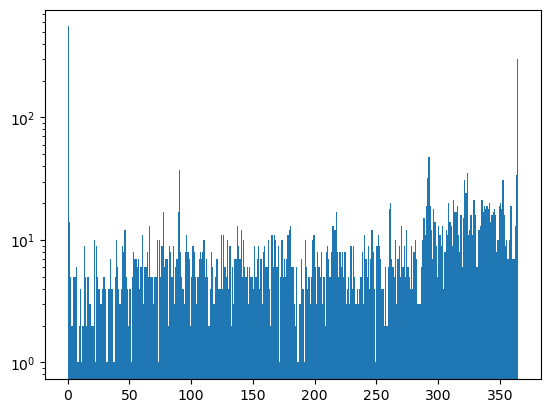

In [423]:
plt.hist(listings[['availability_365']], bins = 365, log = True);

In [424]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [425]:
listings[['property_type', 'room_type']]

,property_type,room_type
0,Entire rental unit,Entire home/apt
1,Entire guest suite,Entire home/apt
2,Entire condo,Entire home/apt
3,Entire rental unit,Entire home/apt
4,Entire rental unit,Entire home/apt
...,...,...
3859,Entire rental unit,Entire home/apt
3860,Private room in home,Private room
3861,Private room in rental unit,Private room
3862,Private room in home,Private room


In [426]:
listings[['property_type']].value_counts()

property_type                     
Entire rental unit                    1696
Private room in rental unit            726
Entire condo                           356
Private room in home                   314
Entire serviced apartment              194
Entire home                            149
Private room in condo                   74
Entire guest suite                      56
Room in boutique hotel                  49
Private room in townhouse               45
Entire townhouse                        42
Private room in bed and breakfast       40
Room in hotel                           24
Entire loft                             17
Private room in guest suite             14
Private room in serviced apartment      12
Shared room in home                      7
Private room in loft                     6
Boat                                     6
Entire place                             5
Shared room in rental unit               4
Private room in vacation home            3
Private room in gue

In [427]:
listings['review_scores_rating']

0       4.96
1       4.79
2       4.81
3       4.64
4       4.63
        ... 
3859    4.41
3860    4.71
3861    4.62
3862    4.69
3863    4.90
Name: review_scores_rating, Length: 3864, dtype: float64

In [428]:
listings[['room_type']].value_counts()

room_type      
Entire home/apt    2528
Private room       1299
Hotel room           21
Shared room          16
dtype: int64

In [429]:
listings['amenities']

0       ["Wifi", "Stove", "Kitchen", "Dishwasher", "Fr...
1       ["Wifi", "Keypad", "Free street parking", "Fir...
2       ["Wifi", "Stove", "Keypad", "Kitchen", "Dishwa...
3       ["Wifi", "Stove", "Kitchen", "Refrigerator", "...
4       ["Wifi", "Kitchen", "Window AC unit", "Free st...
                              ...                        
3859    ["Wifi", "TV with standard cable", "Carbon mon...
3860    ["Wifi", "City skyline view", "Kitchen", "Dish...
3861    ["Wifi", "Stove", "Kitchen", "Dishwasher", "Fr...
3862    ["Wifi", "Keypad", "Free street parking", "Loc...
3863    ["Wifi", "Public or shared beach access", "Kit...
Name: amenities, Length: 3864, dtype: object

In [430]:
listings[['number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,24,2,0,2015-07-10,2022-09-05,4.96,5.00,4.96,5.00,4.96,4.88,4.92
1,118,8,0,2009-03-21,2022-12-05,4.79,4.87,4.89,4.95,4.88,4.53,4.74
2,123,7,0,2009-08-06,2022-11-18,4.81,4.83,4.87,4.91,4.96,4.50,4.72
3,25,0,0,2014-08-12,2020-04-15,4.64,4.68,4.56,4.96,4.96,4.96,4.56
4,377,22,2,2015-01-01,2023-03-04,4.63,4.76,4.81,4.87,4.85,4.48,4.69
...,...,...,...,...,...,...,...,...,...,...,...,...
3859,105,0,0,2014-01-18,2019-05-20,4.41,4.54,4.43,4.65,4.70,4.42,4.41
3860,177,25,1,2014-07-01,2023-03-16,4.71,4.76,4.73,4.87,4.86,4.59,4.67
3861,38,0,0,2013-12-16,2019-09-02,4.62,4.81,4.58,4.83,4.86,4.56,4.36
3862,280,38,1,2014-06-21,2023-02-20,4.69,4.75,4.70,4.89,4.80,4.72,4.71


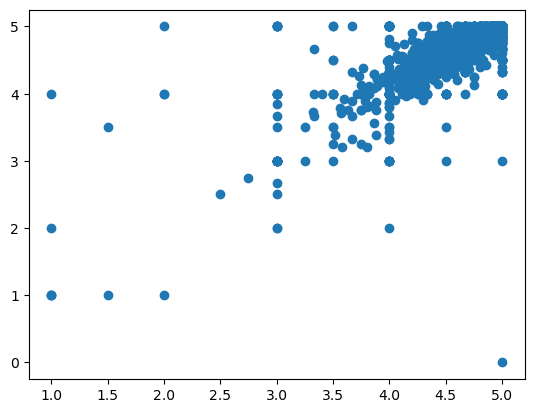

In [431]:
plt.scatter(listings['review_scores_rating'], listings['review_scores_accuracy'])

In [432]:
listings['host_about']

0       My wife and I and grown children frequently oc...
1                   Relaxed,  Easy going, Accommodating. 
2                   Relaxed,  Easy going, Accommodating. 
3       I manage a number of furnished units around Bo...
4       I am committed to provide excellent service an...
                              ...                        
3859    Hello,\r\nMy name is Emmanuel. I am hard worki...
3860    I am a health psychologist and music therapist...
3861    My husband and I live in Jamaica Plain;  I am ...
3862    Hello everyone! Thank you for checking out my ...
3863    I work to live but love my job, traveling, fri...
Name: host_about, Length: 3864, dtype: object

In [433]:
listings[['host_response_rate', 'host_response_time', 'neighbourhood']]

,host_response_rate,host_response_time,neighbourhood
0,89%,within a day,"Boston, Massachusetts, United States"
1,100%,within an hour,"Boston, Massachusetts, United States"
2,100%,within an hour,"Boston, Massachusetts, United States"
3,82%,within a day,"Boston, Massachusetts, United States"
4,100%,within an hour,"Jamaica Plain, Massachusetts, United States"
...,...,...,...
3859,NaN,NaN,"Boston, Massachusetts, United States"
3860,95%,within a day,"Boston, Massachusetts, United States"
3861,NaN,NaN,"Boston, Massachusetts, United States"
3862,100%,within an hour,"Brighton, Massachusetts, United States"


In [434]:
listings[['host_neighbourhood']].value_counts()

host_neighbourhood
Allston-Brighton      466
Cambridge             441
Dorchester            290
Roxbury               233
Jamaica Plain         231
                     ... 
East Falmouth           1
Central Austin          1
East Village            1
South Beach             1
Williamsburg            1
Length: 105, dtype: int64

In [435]:
listings[['host_listings_count', 'host_total_listings_count', 'host_verifications']]

,host_listings_count,host_total_listings_count,host_verifications
0,4,5,"['email', 'phone']"
1,11,14,"['email', 'phone']"
2,11,14,"['email', 'phone']"
3,12,30,"['email', 'phone']"
4,1,1,"['email', 'phone']"
...,...,...,...
3859,1,1,"['email', 'phone']"
3860,5,5,"['email', 'phone']"
3861,1,1,"['email', 'phone']"
3862,2,3,"['email', 'phone']"


In [436]:
listings[['host_verifications']].value_counts()

host_verifications              
['email', 'phone']                  2752
['email', 'phone', 'work_email']     860
['phone']                            248
['phone', 'work_email']                3
['email']                              1
dtype: int64

In [437]:
listings.neighbourhood_cleansed.value_counts()

Dorchester                 511
Downtown                   351
Roxbury                    291
Brighton                   290
Back Bay                   275
South End                  264
East Boston                226
Jamaica Plain              215
Allston                    192
South Boston               170
Beacon Hill                169
Fenway                     163
North End                  107
Chinatown                   99
Charlestown                 75
Roslindale                  67
Hyde Park                   65
Mission Hill                64
Mattapan                    55
Bay Village                 53
South Boston Waterfront     51
West Roxbury                51
West End                    47
Leather District             8
Longwood Medical Area        5
Name: neighbourhood_cleansed, dtype: int64

In [438]:
listings.neighbourhood.value_counts()

Boston, Massachusetts, United States                    2430
Dorchester , Massachusetts, United States                 13
East Boston, Massachusetts, United States                  7
Brighton, Massachusetts, United States                     6
BOSTON, Massachusetts, United States                       4
Dorchester, Massachusetts, United States                   4
Boston , Massachusetts, United States                      3
Charlestown, Massachusetts, United States                  3
Jamaica Plain, Massachusetts, United States                3
Roslindale, Massachusetts, United States                   2
Dorchster , Massachusetts, United States                   2
West Roxbury, Massachusetts, United States                 2
Hyde Park, Massachusetts, United States                    2
Boston, Allston, Ma, United States                         1
波士顿, Massachusetts, United States                          1
Boston (Jamaica Plain), Massachusetts, United States       1
ROXBURY CROSSING, Massac

In [439]:
listings[['bathrooms', 'bathrooms_text']]

,bathrooms,bathrooms_text
0,NaN,1 bath
1,NaN,1 bath
2,NaN,1 bath
3,NaN,1 bath
4,NaN,1 bath
...,...,...
3859,NaN,1.5 baths
3860,NaN,1 shared bath
3861,NaN,1 bath
3862,NaN,1 private bath


In [440]:
listings[['bathrooms_text']].value_counts()

bathrooms_text   
1 bath               2000
1 shared bath         494
2 baths               449
0 shared baths        204
2 shared baths        182
1 private bath        175
1.5 baths             118
1.5 shared baths       72
2.5 baths              68
3 baths                41
2.5 shared baths       14
3.5 baths              14
3 shared baths          9
4 baths                 5
5 baths                 4
4.5 baths               3
6 baths                 3
0 baths                 2
4 shared baths          2
3.5 shared baths        1
Half-bath               1
Private half-bath       1
dtype: int64

## Run a quick LR model for comparison

In [441]:
# Imports

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [442]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [443]:
lstn = listings[['name',
       'description', 'neighborhood_overview', 'host_id', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

In [444]:
lstn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          3864 non-null   object 
 1   description                                   3846 non-null   object 
 2   neighborhood_overview                         2497 non-null   object 
 3   host_id                                       3864 non-null   int64  
 4   host_since                                    3864 non-null   object 
 5   host_response_time                            3344 non-null   object 
 6   host_response_rate                            3344 non-null   object 
 7   host_acceptance_rate                          3405 non-null   object 
 8   host_is_superhost                             3862 non-null   object 
 9   host_listings_count                           3864 non-null   i

In [445]:
#  Source for this code: https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
lstn_num = lstn._get_numeric_data()
lstn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_id                                       3864 non-null   int64  
 1   host_listings_count                           3864 non-null   int64  
 2   host_total_listings_count                     3864 non-null   int64  
 3   neighbourhood_group_cleansed                  0 non-null      float64
 4   latitude                                      3864 non-null   float64
 5   longitude                                     3864 non-null   float64
 6   accommodates                                  3864 non-null   int64  
 7   bathrooms                                     0 non-null      float64
 8   bedrooms                                      3404 non-null   float64
 9   beds                                          3784 non-null   f

In [446]:
lstn_num.drop(columns=['neighbourhood_group_cleansed', 'bathrooms'], inplace=True)

In [447]:
lstn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_id                                       3864 non-null   int64  
 1   host_listings_count                           3864 non-null   int64  
 2   host_total_listings_count                     3864 non-null   int64  
 3   latitude                                      3864 non-null   float64
 4   longitude                                     3864 non-null   float64
 5   accommodates                                  3864 non-null   int64  
 6   bedrooms                                      3404 non-null   float64
 7   beds                                          3784 non-null   float64
 8   minimum_nights                                3864 non-null   int64  
 9   maximum_nights                                3864 non-null   i

In [448]:
review_cols = [col for col in lstn_num.columns if 'review' in col]
review_cols

['number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [449]:
lstn_num_norev = lstn_num.drop(columns=review_cols)
lstn_num_norev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_id                                       3864 non-null   int64  
 1   host_listings_count                           3864 non-null   int64  
 2   host_total_listings_count                     3864 non-null   int64  
 3   latitude                                      3864 non-null   float64
 4   longitude                                     3864 non-null   float64
 5   accommodates                                  3864 non-null   int64  
 6   bedrooms                                      3404 non-null   float64
 7   beds                                          3784 non-null   float64
 8   minimum_nights                                3864 non-null   int64  
 9   maximum_nights                                3864 non-null   i

In [450]:
lstn_num_norev.dropna(inplace=True)

In [451]:
lstn_num_norev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3345 entries, 0 to 3863
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_id                                       3345 non-null   int64  
 1   host_listings_count                           3345 non-null   int64  
 2   host_total_listings_count                     3345 non-null   int64  
 3   latitude                                      3345 non-null   float64
 4   longitude                                     3345 non-null   float64
 5   accommodates                                  3345 non-null   int64  
 6   bedrooms                                      3345 non-null   float64
 7   beds                                          3345 non-null   float64
 8   minimum_nights                                3345 non-null   int64  
 9   maximum_nights                                3345 non-null   i

In [452]:
float(listings.price[0].replace('$','').strip())

132.0

In [453]:
prices = listings.price.apply(lambda x: float(x.replace('$','').replace(',','').strip()))
prices

0        132.0
1        149.0
2        179.0
3         90.0
4         98.0
         ...  
3859    1299.0
3860      94.0
3861     120.0
3862      75.0
3863     514.0
Name: price, Length: 3864, dtype: float64

In [454]:
lstn_num_norev.index

Int64Index([   0,    1,    3,    5,    7,    8,    9,   10,   11,   12,
            ...
            3854, 3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863],
           dtype='int64', length=3345)

In [455]:
prices.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3864 entries, 0 to 3863
Series name: price
Non-Null Count  Dtype  
--------------  -----  
3864 non-null   float64
dtypes: float64(1)
memory usage: 30.3 KB


In [456]:
y = prices[lstn_num_norev.index]

In [457]:
y.index

Int64Index([   0,    1,    3,    5,    7,    8,    9,   10,   11,   12,
            ...
            3854, 3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863],
           dtype='int64', length=3345)

In [458]:
X = lstn_num_norev

In [459]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [460]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [461]:
preds = lr.predict(X_test)

In [462]:
len(preds)

669

In [463]:
len(X_test)

669

In [464]:
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [465]:
y_test

1236     80.0
2655    321.0
1784    125.0
1387    155.0
1423     72.0
        ...  
1201    152.0
1870    120.0
2241    147.0
386      60.0
80       59.0
Name: price, Length: 669, dtype: float64

In [466]:
lr.score(X_train, y_train)

0.33299569468858026

In [467]:
lr.score(X_test, y_test)

0.062416630329894196

In [468]:
r2_score(y_test, preds)

0.062416630329894196

# Do a better job on the LR model this time

In [469]:
lstn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          3864 non-null   object 
 1   description                                   3846 non-null   object 
 2   neighborhood_overview                         2497 non-null   object 
 3   host_id                                       3864 non-null   int64  
 4   host_since                                    3864 non-null   object 
 5   host_response_time                            3344 non-null   object 
 6   host_response_rate                            3344 non-null   object 
 7   host_acceptance_rate                          3405 non-null   object 
 8   host_is_superhost                             3862 non-null   object 
 9   host_listings_count                           3864 non-null   i

In [470]:
lstn.drop(columns=review_cols, inplace = True)

C:\Users\Dan\AppData\Local\Temp\ipykernel_25412\1579926181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstn.drop(columns=review_cols, inplace = True)


In [471]:
lstn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 41 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          3864 non-null   object 
 1   description                                   3846 non-null   object 
 2   neighborhood_overview                         2497 non-null   object 
 3   host_id                                       3864 non-null   int64  
 4   host_since                                    3864 non-null   object 
 5   host_response_time                            3344 non-null   object 
 6   host_response_rate                            3344 non-null   object 
 7   host_acceptance_rate                          3405 non-null   object 
 8   host_is_superhost                             3862 non-null   object 
 9   host_listings_count                           3864 non-null   i

In [472]:
lstn.columns

Index(['name', 'description', 'neighborhood_overview', 'host_id', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'first_review', 'last_review', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [473]:
keep_cols = ['host_identity_verified',
       'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calculated_host_listings_count',
            
            'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'host_id',
 'host_listings_count',
 'host_total_listings_count']

In [474]:
lstn_new = lstn[keep_cols].copy()
lstn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_identity_verified                        3864 non-null   object 
 1   neighbourhood_cleansed                        3864 non-null   object 
 2   latitude                                      3864 non-null   float64
 3   longitude                                     3864 non-null   float64
 4   property_type                                 3864 non-null   object 
 5   room_type                                     3864 non-null   object 
 6   accommodates                                  3864 non-null   int64  
 7   bathrooms_text                                3862 non-null   object 
 8   bedrooms                                      3404 non-null   float64
 9   beds                                          3784 non-null   f

In [475]:
lstn_new.price = lstn_new.price.apply(lambda x: float(x.replace('$','').replace(',','').strip()))

In [476]:
lstn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_identity_verified                        3864 non-null   object 
 1   neighbourhood_cleansed                        3864 non-null   object 
 2   latitude                                      3864 non-null   float64
 3   longitude                                     3864 non-null   float64
 4   property_type                                 3864 non-null   object 
 5   room_type                                     3864 non-null   object 
 6   accommodates                                  3864 non-null   int64  
 7   bathrooms_text                                3862 non-null   object 
 8   bedrooms                                      3404 non-null   float64
 9   beds                                          3784 non-null   f

In [477]:
'''
 0   host_identity_verified          3864 non-null   object  >>>>>>  DONE --------map funciton 
 1   neighbourhood_cleansed          3864 non-null   object  >>>>>>  OHE (get dummies)
 4   property_type                   3864 non-null   object  >>>>>>  DROP THIS----Filter then OHE
 5   room_type                       3864 non-null   object  >>>>>>  OHE
 7   bathrooms_text                  3862 non-null   object  >>>>>>  OHE to start, otherwise use RE to split up
 10  amenities                       3864 non-null   object  >>>>>>  DROP this for now:  cannot be count vectorized...need to do something different
 14  has_availability                3864 non-null   object  >>>>>>  DONE --------map function


''';

In [478]:
lstn_new.host_identity_verified = lstn_new.host_identity_verified.map({'t':1, 'f':0})
lstn_new.has_availability = lstn_new.has_availability.map({'t':1, 'f':0})

In [479]:
lstn_new.room_type.value_counts()

Entire home/apt    2528
Private room       1299
Hotel room           21
Shared room          16
Name: room_type, dtype: int64

In [480]:
lstn_new.drop(columns='property_type', inplace = True)

In [481]:
lstn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_identity_verified                        3864 non-null   int64  
 1   neighbourhood_cleansed                        3864 non-null   object 
 2   latitude                                      3864 non-null   float64
 3   longitude                                     3864 non-null   float64
 4   room_type                                     3864 non-null   object 
 5   accommodates                                  3864 non-null   int64  
 6   bathrooms_text                                3862 non-null   object 
 7   bedrooms                                      3404 non-null   float64
 8   beds                                          3784 non-null   float64
 9   amenities                                     3864 non-null   o

In [482]:
lstn_new.amenities

0       ["Wifi", "Stove", "Kitchen", "Dishwasher", "Fr...
1       ["Wifi", "Keypad", "Free street parking", "Fir...
2       ["Wifi", "Stove", "Keypad", "Kitchen", "Dishwa...
3       ["Wifi", "Stove", "Kitchen", "Refrigerator", "...
4       ["Wifi", "Kitchen", "Window AC unit", "Free st...
                              ...                        
3859    ["Wifi", "TV with standard cable", "Carbon mon...
3860    ["Wifi", "City skyline view", "Kitchen", "Dish...
3861    ["Wifi", "Stove", "Kitchen", "Dishwasher", "Fr...
3862    ["Wifi", "Keypad", "Free street parking", "Loc...
3863    ["Wifi", "Public or shared beach access", "Kit...
Name: amenities, Length: 3864, dtype: object

In [483]:
lstn_new.drop(columns='amenities', inplace=True)

In [484]:
lstn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_identity_verified                        3864 non-null   int64  
 1   neighbourhood_cleansed                        3864 non-null   object 
 2   latitude                                      3864 non-null   float64
 3   longitude                                     3864 non-null   float64
 4   room_type                                     3864 non-null   object 
 5   accommodates                                  3864 non-null   int64  
 6   bathrooms_text                                3862 non-null   object 
 7   bedrooms                                      3404 non-null   float64
 8   beds                                          3784 non-null   float64
 9   price                                         3864 non-null   f

In [485]:
lstn_new = pd.get_dummies(lstn_new, columns=['neighbourhood_cleansed', 'room_type', 'bathrooms_text'], drop_first=True)

In [486]:
lstn_new.bedrooms.fillna(0, inplace=True)
lstn_new.beds.fillna(0, inplace=True)

In [487]:
lstn_new.dropna(inplace=True)

In [488]:
lstn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 69 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   host_identity_verified                          3864 non-null   int64  
 1   latitude                                        3864 non-null   float64
 2   longitude                                       3864 non-null   float64
 3   accommodates                                    3864 non-null   int64  
 4   bedrooms                                        3864 non-null   float64
 5   beds                                            3864 non-null   float64
 6   price                                           3864 non-null   float64
 7   minimum_nights                                  3864 non-null   int64  
 8   maximum_nights                                  3864 non-null   int64  
 9   has_availability                         

In [489]:
lr1 = LinearRegression()

In [490]:
X = lstn_new.drop(columns='price')
y = lstn_new.price

In [491]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [492]:
lr1.fit(X_train, y_train)

LinearRegression()

In [493]:
lr1.score(X_train, y_train)

0.24689750800594856

In [494]:
lr1.score(X_test, y_test)

0.4012557045926609

In [495]:
set(lstn_num_norev.columns) - set(lstn_new.columns)

set()

# OK, how about we try to predict ratings???

In [530]:
lstn = listings[['name',
       'description', 'neighborhood_overview', 'host_id', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

In [531]:
lstn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          3864 non-null   object 
 1   description                                   3846 non-null   object 
 2   neighborhood_overview                         2497 non-null   object 
 3   host_id                                       3864 non-null   int64  
 4   host_since                                    3864 non-null   object 
 5   host_response_time                            3344 non-null   object 
 6   host_response_rate                            3344 non-null   object 
 7   host_acceptance_rate                          3405 non-null   object 
 8   host_is_superhost                             3862 non-null   object 
 9   host_listings_count                           3864 non-null   i

In [532]:
lstn[['host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified']]

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
0,2008-12-03,within a day,89%,22%,t,4,5,"['email', 'phone']",t,f
1,2009-02-19,within an hour,100%,100%,t,11,14,"['email', 'phone']",t,t
2,2009-02-19,within an hour,100%,100%,t,11,14,"['email', 'phone']",t,t
3,2009-07-22,within a day,82%,55%,f,12,30,"['email', 'phone']",t,t
4,2014-12-07,within an hour,100%,100%,t,1,1,"['email', 'phone']",t,t
...,...,...,...,...,...,...,...,...,...,...
3859,2013-10-24,NaN,NaN,NaN,f,1,1,"['email', 'phone']",t,t
3860,2013-11-09,within a day,95%,79%,f,5,5,"['email', 'phone']",t,t
3861,2012-04-16,NaN,NaN,NaN,f,1,1,"['email', 'phone']",t,t
3862,2011-12-20,within an hour,100%,98%,f,2,3,"['email', 'phone']",t,t


In [533]:
lstn.host_response_time.value_counts()

within an hour        2589
within a few hours     553
within a day           182
a few days or more      20
Name: host_response_time, dtype: int64

In [534]:
lstn.columns

Index(['name', 'description', 'neighborhood_overview', 'host_id', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_sc

In [535]:
keep_cols = ['host_identity_verified',
       'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calculated_host_listings_count',
            
            'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'host_id',
 'host_listings_count', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
 'host_total_listings_count', 'review_scores_rating']

In [536]:
lstn_new = lstn[keep_cols].copy()
lstn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_identity_verified                        3864 non-null   object 
 1   neighbourhood_cleansed                        3864 non-null   object 
 2   latitude                                      3864 non-null   float64
 3   longitude                                     3864 non-null   float64
 4   property_type                                 3864 non-null   object 
 5   room_type                                     3864 non-null   object 
 6   accommodates                                  3864 non-null   int64  
 7   bathrooms_text                                3862 non-null   object 
 8   bedrooms                                      3404 non-null   float64
 9   beds                                          3784 non-null   f

In [537]:
lstn_new.price = lstn_new.price.apply(lambda x: float(x.replace('$','').replace(',','').strip()))

In [552]:
lstn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_identity_verified                        3864 non-null   object 
 1   neighbourhood_cleansed                        3864 non-null   object 
 2   latitude                                      3864 non-null   float64
 3   longitude                                     3864 non-null   float64
 4   property_type                                 3864 non-null   object 
 5   room_type                                     3864 non-null   object 
 6   accommodates                                  3864 non-null   int64  
 7   bathrooms_text                                3862 non-null   object 
 8   bedrooms                                      3404 non-null   float64
 9   beds                                          3784 non-null   f

In [553]:
'''
 0   host_identity_verified          3864 non-null   object  >>>>>>  DONE --------map funciton 
 1   neighbourhood_cleansed          3864 non-null   object  >>>>>>  OHE (get dummies)
 4   property_type                   3864 non-null   object  >>>>>>  DROP THIS----Filter then OHE
 5   room_type                       3864 non-null   object  >>>>>>  OHE
 7   bathrooms_text                  3862 non-null   object  >>>>>>  OHE to start, otherwise use RE to split up
 10  amenities                       3864 non-null   object  >>>>>>  DROP this for now:  cannot be count vectorized...need to do something different
 14  has_availability                3864 non-null   object  >>>>>>  DONE --------map function


''';

In [554]:
lstn_new.host_identity_verified = lstn_new.host_identity_verified.map({'t':1, 'f':0})
lstn_new.has_availability = lstn_new.has_availability.map({'t':1, 'f':0})

In [555]:
lstn_new.room_type.value_counts()

Entire home/apt    2528
Private room       1299
Hotel room           21
Shared room          16
Name: room_type, dtype: int64

In [556]:
lstn_new.drop(columns='property_type', inplace = True)

In [557]:
lstn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_identity_verified                        3864 non-null   int64  
 1   neighbourhood_cleansed                        3864 non-null   object 
 2   latitude                                      3864 non-null   float64
 3   longitude                                     3864 non-null   float64
 4   room_type                                     3864 non-null   object 
 5   accommodates                                  3864 non-null   int64  
 6   bathrooms_text                                3862 non-null   object 
 7   bedrooms                                      3404 non-null   float64
 8   beds                                          3784 non-null   float64
 9   amenities                                     3864 non-null   o

In [558]:
lstn_new.amenities

0       ["Wifi", "Stove", "Kitchen", "Dishwasher", "Fr...
1       ["Wifi", "Keypad", "Free street parking", "Fir...
2       ["Wifi", "Stove", "Keypad", "Kitchen", "Dishwa...
3       ["Wifi", "Stove", "Kitchen", "Refrigerator", "...
4       ["Wifi", "Kitchen", "Window AC unit", "Free st...
                              ...                        
3859    ["Wifi", "TV with standard cable", "Carbon mon...
3860    ["Wifi", "City skyline view", "Kitchen", "Dish...
3861    ["Wifi", "Stove", "Kitchen", "Dishwasher", "Fr...
3862    ["Wifi", "Keypad", "Free street parking", "Loc...
3863    ["Wifi", "Public or shared beach access", "Kit...
Name: amenities, Length: 3864, dtype: object

In [559]:
lstn_new.drop(columns='amenities', inplace=True)

In [560]:
lstn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_identity_verified                        3864 non-null   int64  
 1   neighbourhood_cleansed                        3864 non-null   object 
 2   latitude                                      3864 non-null   float64
 3   longitude                                     3864 non-null   float64
 4   room_type                                     3864 non-null   object 
 5   accommodates                                  3864 non-null   int64  
 6   bathrooms_text                                3862 non-null   object 
 7   bedrooms                                      3404 non-null   float64
 8   beds                                          3784 non-null   float64
 9   price                                         3864 non-null   f

In [561]:
lstn_new = pd.get_dummies(lstn_new, columns=['neighbourhood_cleansed', 'room_type', 'bathrooms_text'], drop_first=True)

In [562]:
lstn_new.bedrooms.fillna(0, inplace=True)
lstn_new.beds.fillna(0, inplace=True)

In [563]:
lstn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 73 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   host_identity_verified                          3864 non-null   int64  
 1   latitude                                        3864 non-null   float64
 2   longitude                                       3864 non-null   float64
 3   accommodates                                    3864 non-null   int64  
 4   bedrooms                                        3864 non-null   float64
 5   beds                                            3864 non-null   float64
 6   price                                           3864 non-null   float64
 7   minimum_nights                                  3864 non-null   int64  
 8   maximum_nights                                  3864 non-null   int64  
 9   has_availability                         

In [564]:
lstn_new.dropna(inplace=True)

In [565]:
lstn_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2346 entries, 0 to 3863
Data columns (total 73 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   host_identity_verified                          2346 non-null   int64  
 1   latitude                                        2346 non-null   float64
 2   longitude                                       2346 non-null   float64
 3   accommodates                                    2346 non-null   int64  
 4   bedrooms                                        2346 non-null   float64
 5   beds                                            2346 non-null   float64
 6   price                                           2346 non-null   float64
 7   minimum_nights                                  2346 non-null   int64  
 8   maximum_nights                                  2346 non-null   int64  
 9   has_availability                         

In [567]:
lstn_new.host_response_rate = lstn_new.host_response_rate.apply(lambda x: (float(x.replace('%', '').strip())))
lstn_new.host_acceptance_rate = lstn_new.host_acceptance_rate.apply(lambda x: (float(x.replace('%', '').strip())))

In [569]:
lstn_new = pd.get_dummies(lstn_new, columns=['host_response_time'], drop_first=True)

In [571]:
lstn_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2346 entries, 0 to 3863
Data columns (total 75 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   host_identity_verified                          2346 non-null   int64  
 1   latitude                                        2346 non-null   float64
 2   longitude                                       2346 non-null   float64
 3   accommodates                                    2346 non-null   int64  
 4   bedrooms                                        2346 non-null   float64
 5   beds                                            2346 non-null   float64
 6   price                                           2346 non-null   float64
 7   minimum_nights                                  2346 non-null   int64  
 8   maximum_nights                                  2346 non-null   int64  
 9   has_availability                         

In [572]:
lr_rev = LinearRegression()

In [573]:
X = lstn_new.drop(columns='review_scores_rating')
y = lstn_new.review_scores_rating

In [574]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [575]:
lr_rev.fit(X_train, y_train)

LinearRegression()

In [576]:
lr_rev.score(X_train, y_train)

0.16616027512558496

In [577]:
lr_rev.score(X_test, y_test)

0.14842426024217248

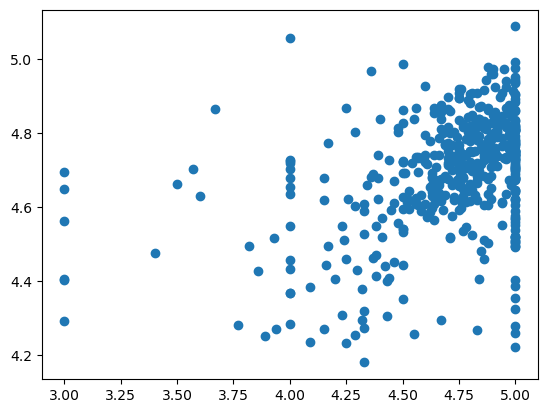

In [578]:
plt.scatter(y_test, lr_rev.predict(X_test))

In [523]:
preds = lr_rev.predict(X_test)

In [524]:
len(y_test)

549

In [525]:
pd.DataFrame([list(y_test), lr_rev.predict(X_test)]).T.corr()

,0,1
0,1.000000,0.306372
1,0.306372,1.000000


# Calendar Quick check

In [9]:
calendar = pd.read_csv('../data/calendar.csv')

In [10]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2023-03-19,f,$125.00,$125.00,32.0,1125.0
1,3781,2023-03-20,f,$125.00,$125.00,32.0,1125.0
2,3781,2023-03-21,f,$125.00,$125.00,32.0,1125.0
3,3781,2023-03-22,f,$125.00,$125.00,32.0,1125.0
4,3781,2023-03-23,f,$125.00,$125.00,32.0,1125.0


In [29]:
calendar.shape

(1410023, 7)

In [11]:
calendar['listing_id'].nunique()

3863

In [30]:
1410023/3863

365.00724825265337

In [15]:
set(listings['id']) - set(calendar['listing_id'])

{46232976}

In [20]:
# Set intersection:  https://www.w3schools.com/python/ref_set_intersection.asp

len(set(listings['id']).intersection(set(df['listing_id'])))

2741

In [21]:
set(listings['id']).intersection(set(df['listing_id'])) == set(df['listing_id'])

True

In [23]:
set(listings['id']).intersection(set(calendar['listing_id'])) == set(calendar['listing_id'])

True

In [24]:
listings['number_of_reviews'].value_counts()

0      1123
1       293
2       161
3       110
4        92
       ... 
320       1
647       1
198       1
227       1
280       1
Name: number_of_reviews, Length: 328, dtype: int64

In [28]:
set(listings[listings['number_of_reviews'] != 0]['id']) == set(df['listing_id'])

True